<h3>Importing the required libraries</h3>
<p>Loading the libraries that are going to be used during the analysis.</p>

In [1]:
#Importing the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%run -i '/home/juan-david/Documents/data_science/course_openclassrooms/projet_2/livrables/p2_analyse_exploratoire_fonctions_aide.py'
import sys
import scipy.stats

<h3>1. Loading the dataframes</h3>
<p>Guaranteeing the test set meet all the requirements for the evaluation phase.</p>

In [2]:
edStatsCountry = pd.read_csv('/home/juan-david/Documents/data_science/course_openclassrooms/projet_2/donnees/EdStatsCountry.csv', engine='python')
eDdStatsCountry_Series = pd.read_csv('/home/juan-david/Documents/data_science/course_openclassrooms/projet_2/donnees/EdStatsCountry-Series.csv', engine='python')
edStatsData = pd.read_csv('/home/juan-david/Documents/data_science/course_openclassrooms/projet_2/donnees/EdStatsData.csv', engine='python')
edStatsFootNote = pd.read_csv('/home/juan-david/Documents/data_science/course_openclassrooms/projet_2/donnees/EdStatsFootNote.csv', engine='python')
edStatsSeries = pd.read_csv('/home/juan-david/Documents/data_science/course_openclassrooms/projet_2/donnees/EdStatsSeries.csv', engine='python')
country_codes = pd.read_csv('/home/juan-david/Documents/data_science/course_openclassrooms/projet_2/donnees/country_codes.csv', engine='python')

<h3>2.1 Analysis of the "edStatsCountry" dataframe</h3>
<p>This dataframe contains countries' information such as the currency name, the countrie's SNA (type of accounts system to guarantee international consistency), status of external debt,etc.</p>
<p>Analysing the principal characteristics of the stats-country dataframe.</p>
<ol>
<p>-Shape.</p>
<p>-Data types.</p>  
<p>-Identifying the amount null values, if possible.</p>
<p>-Unique values number count in object columns</p>   
<p>-Relevant columns.</p>
<p>-Others.</p>
</ol>

In [3]:
#Print the first 5 dataframe lines.
print(edStatsCountry.head(2))

  Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   

            IMF data dissemination standard  Latest population census  \
0                                       NaN                      2010   
1  General Data Dissemination System (GDDS)                      1979   

                             Latest household survey  \
0                    

In [4]:
#Dataframe shape.
edStatsCountry.shape

(241, 32)

In [5]:
#Summary of dataframe information
#Creates a method that gives a dataframe containing some information for the dataframe in analysis.
edStatsCountry_info = give_df_info(edStatsCountry)
print(edStatsCountry_info)

                                       Variable_names Data_types  Nan_percent  \
0                                        Country Code     object     0.000000   
1                                          Short Name     object     0.000000   
2                                          Table Name     object     0.000000   
3                                           Long Name     object     0.000000   
4                                        2-alpha code     object     0.012448   
5                                       Currency Unit     object     0.107884   
6                                       Special Notes     object     0.398340   
7                                              Region     object     0.112033   
8                                        Income Group     object     0.112033   
9                                           WB-2 code     object     0.004149   
10                        National accounts base year     object     0.149378   
11                   Nationa

/home/juan-david/Documents/data_science/course_openclassrooms/projet_2/livrables/p2_analyse_exploratoire_fonctions_aide.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'edStatsCountry: missing values')

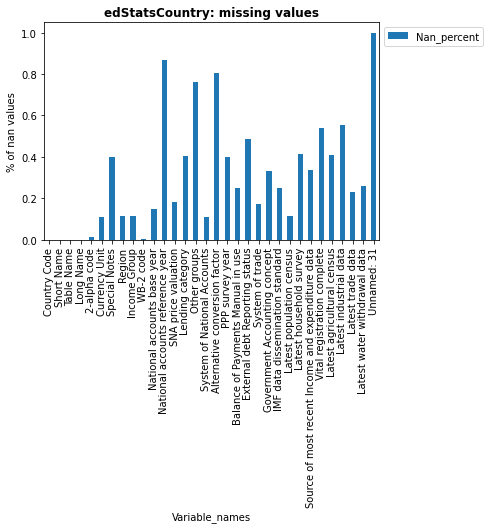

In [6]:
#Bar plot for percent of Nan values in columns.
ax = edStatsCountry_info.plot.bar(x='Variable_names', y='Nan_percent', rot=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={"size":10})
plt.xticks(rotation=90)
plt.axes().set_ylabel('% of nan values')
plt.title('edStatsCountry: missing values',fontweight="bold" )

<h4>Relevant columns</h4>
<p>- External debt Reporting status.</p>
<p>- Increase their capital.</p>

<h3>2.2 Analysis of the "edStatsCountry-Series" dataframe</h3>
<p>Dataframe containing information about indicators codes per country </p>
<p>Analysing the principal characteristics of the "edStats-country dataframe.</p>
<ol>
<p>-Shape.</p>
<p>-Data types.</p>  
<p>-Identifying the amount null values, if possible.</p>
<p>-Unique values number count in object columns</p>   
<p>-Relevant columns.</p>
<p>-Others.</p>
</ol>

In [7]:
#Print the first 5 dataframe lines.
print(eDdStatsCountry_Series.head(2))

  CountryCode   SeriesCode                                        DESCRIPTION  \
0         ABW  SP.POP.TOTL  Data sources : United Nations World Population...   
1         ABW  SP.POP.GROW  Data sources: United Nations World Population ...   

   Unnamed: 3  
0         NaN  
1         NaN  


In [8]:
#Dataframe shape
eDdStatsCountry_Series.shape

(613, 4)

In [9]:
#Summary of dataframe information.
eDdStatsCountry_Series_info = give_df_info(eDdStatsCountry_Series)
print(eDdStatsCountry_Series_info)

  Variable_names Data_types  Nan_percent  Unique_values
0    CountryCode     object          0.0            211
1     SeriesCode     object          0.0             21
2    DESCRIPTION     object          0.0             97
3     Unnamed: 3    float64          1.0  real_variable


/home/juan-david/Documents/data_science/course_openclassrooms/projet_2/livrables/p2_analyse_exploratoire_fonctions_aide.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'eDdStatsCountry_Series: missing values')

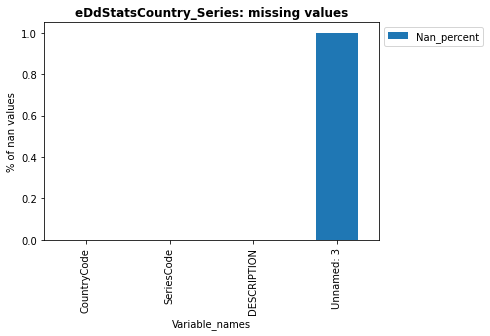

In [10]:
#Bar plot for percent of Nan values in columns.
ax = eDdStatsCountry_Series_info.plot.bar(x='Variable_names', y='Nan_percent', rot=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={"size":10})
plt.xticks(rotation=90)
plt.axes().set_ylabel('% of nan values')
plt.title('eDdStatsCountry_Series: missing values',fontweight="bold" )

<h4>Relevant columns</h4>
<p>- CountryCode : For making mapping of countries' continents in other dataframes.</p>
<p>- SeriesCode : For making mapping of countries' continents in other dataframes.</p>

<h3>2.3 Analysis of the "edStatsData" dataframe</h3>
<p> This is the main dataset containing information about education within countries. The indicators per country were calculated over the gap between 1970 to 2100 as a time series. It could be possible to find indicators such as "Adjusted net enrolment rate, lower secondary, both sexes (%)", "Adjusted net enrolment rate, primary, female (%)", "Adjusted net enrolment rate, primary, gender parity index (GPI)", and "Annual statutory teacher salaries in public institutions in USD". For each indicator, the values after the last reported measurement are estimates, if found. </p>
<p>Analysing the principal characteristics of the "edStats-country dataframe.</p>
<ol>
<p>-Shape.</p>
<p>-Data types.</p>  
<p>-Identifying the amount null values, if possible.</p>
<p>-Unique values number count in object columns</p>   
<p>-Relevant columns.</p>
<p>-Others.</p>
</ol>

In [11]:
#Print the first 5 dataframe lines.
print(edStatsData.head(2))

  Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   

                                      Indicator Name Indicator Code  1970  \
0  Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...   UIS.NERA.2.F   NaN   

   1971  1972  1973  1974  1975  ...  2060  2065  2070  2075  2080  2085  \
0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN          NaN  

[2 rows x 70 columns]


In [12]:
#Dataframe shape
edStatsData.shape

(886930, 70)

In [13]:
#Dataframe unique values for countries and indicators.
print(len(list(edStatsData["Country Name"].unique())))
print(len(list(edStatsData["Indicator Name"].unique())))

242
3665


In [14]:
#Summary of dataframe information
edStatsData_info = give_df_info(edStatsData)
print(edStatsData_info)

    Variable_names Data_types  Nan_percent  Unique_values
0     Country Name     object     0.000000            242
1     Country Code     object     0.000000            242
2   Indicator Name     object     0.000000           3665
3   Indicator Code     object     0.000000           3665
4             1970    float64     0.918496  real_variable
..             ...        ...          ...            ...
65            2085    float64     0.942007  real_variable
66            2090    float64     0.942007  real_variable
67            2095    float64     0.942007  real_variable
68            2100    float64     0.942007  real_variable
69     Unnamed: 69    float64     1.000000  real_variable

[70 rows x 4 columns]


/home/juan-david/Documents/data_science/course_openclassrooms/projet_2/livrables/p2_analyse_exploratoire_fonctions_aide.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'edStatsData: missing values')

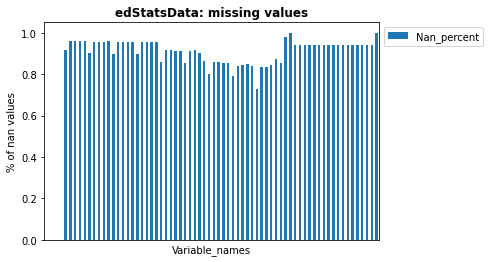

In [15]:
#Bar plot for percent of Nan values in columns.
ax = edStatsData_info.plot.bar(x='Variable_names', y='Nan_percent', rot=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={"size":10})
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 
plt.axes().set_ylabel('% of nan values')
plt.title('edStatsData: missing values',fontweight="bold" )

<h4>Relevant columns</h4>
<p>- Country Name.</p>
<p>- Indicator Name.</p>
<p>- Time series columns named by years (1970, 1971, 1972... etc.).</p>

<h3>2.3.1 Timeseries analysis over "edStatsData" dataframe indicators.</h3>
<p> This section aims to analize and select education indicators by working over the time series data.</p>
<ol>
<p>- Cleaning, filtering, adjustment and filling of missing values over the data.</p>
<p>- Normalizing values to compare and extract conclusions.</p>
<p>- Indicators may be related to education investment, online trends, educational system's problems, and demographics within different countries.</p>
</ol>

<h3>2.3.1.1 "edStatsData" data cleaning and engineering.</h3>

<h4>- Changing the name of some indicators for better comprehension.</h4>

In [16]:
#Shortening the name of some indicators for further analysis.
#The followings are modifyied:
# Government expenditure in secondary institutions education as % of GDP (%),GovernmentExpenditureSecondary_as_%_GDP,Government expenditure in tertiary institutions as % of GDP (%),GovernmentExpenditureTertiary_as_%_GDP,Pupil-teacher ratio in secondary education (headcount basis,Pupil-teacherRatioSecondaryEducation,Pupil-teacher ratio in tertiary education (headcount basis,Pupil-teacherRatioTertiaryEducation,Rate of out-of-school adolescents of lower secondary school age,Rate-out-of-school-LowerYouthSecondary,Rate of out-of-school youth of upper secondary school age,both sexes (%)': 'Rate-out-of-school-UpperYouthSecondary,Unemployment, total (% of total labor force,Unemployment-percent,Youth literacy rate, population 15-24 years, both sexes (%), LiteracyRateYouths.
edStatsData['Indicator Name'] = edStatsData['Indicator Name'].replace({'Government expenditure in secondary institutions education as % of GDP (%)': 'GovernmentExpenditureSecondary_as_%_GDP', 'Government expenditure in tertiary institutions as % of GDP (%)': 'GovernmentExpenditureTertiary_as_%_GDP', 'Pupil-teacher ratio in secondary education (headcount basis)': 'Pupil-teacherRatioSecondaryEducation', 'Pupil-teacher ratio in tertiary education (headcount basis)': 'Pupil-teacherRatioTertiaryEducation','Rate of out-of-school adolescents of lower secondary school age':'Rate-out-of-school-LowerYouthSecondary', 'Rate of out-of-school youth of upper secondary school age, both sexes (%)': 'Rate-out-of-school-UpperYouthSecondary', 'Unemployment, total (% of total labor force)': 'Unemployment-percent','Youth literacy rate, population 15-24 years, both sexes (%)': 'LiteracyRateYouths',})

<h4>- Selecting only countries from database (continents and country groups are avoided).</h4>
<h4>- Adding continent column to the dataframe by mapping.</h4>

In [17]:
#Selecting rows containing unically information about countries from the database. Aggregated indicator series are removed.
#Continents and groups of countries tried to be removed.
list_countries = country_codes["ISO3"].tolist()
list_countries = [x for x in list_countries if str(x) != 'nan']
edStatsData = edStatsData[edStatsData["Country Code"].isin(list_countries)]
#Create a column within the dataframe that contains the continent that each country belongs to.
#Creating mapping dictionary for continent regions.
equiv = dict(list(zip(country_codes["ISO3"], country_codes["Continent"])))
equiv_2 = dict(list(zip(country_codes["Country Name"], country_codes["Continent"])))
edStatsData = df_country_continent_mapping(edStatsData, equiv_2)
print(edStatsData.head(2))
print(edStatsData.shape)

      Country Name Country Code  \
91625  Afghanistan          AFG   
91626  Afghanistan          AFG   

                                          Indicator Name Indicator Code  1970  \
91625  Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2   NaN   
91626  Adjusted net enrolment rate, lower secondary, ...   UIS.NERA.2.F   NaN   

       1971  1972  1973     1974  1975  ...  2065  2070  2075  2080  2085  \
91625   NaN   NaN   NaN  7.05911   NaN  ...   NaN   NaN   NaN   NaN   NaN   
91626   NaN   NaN   NaN  2.53138   NaN  ...   NaN   NaN   NaN   NaN   NaN   

       2090  2095  2100  Unnamed: 69  Country Continent  
91625   NaN   NaN   NaN          NaN               Asia  
91626   NaN   NaN   NaN          NaN               Asia  

[2 rows x 71 columns]
(747660, 71)


<h4>- Avoiding null columns.</h4>

In [18]:
edStatsData = edStatsData.dropna(axis=1,how='all')
print(edStatsData.shape)

(747660, 70)


<h4>- Avoiding year columns not laying between 1990 and 2017 years.</h4>

In [19]:
#Avoiding year columns earlier than 1990 and older than 2017 in the dataframme.
edStatsData = delete_ancient_and_future_series(edStatsData,1990,2017)
print(edStatsData.shape)

(747660, 33)


<h4>- Removing rows for indicators that are almost null.</h4>

In [20]:
#Obtain a list with ithe different indicators of the database.
list_of_indicators = list(edStatsData["Indicator Name"].unique())
#Obtain a list with indicators having too many Nan values.
#If indicators contain less than 20% of the entries in series,they are removed.
almost_null_inds = indicators_almost_null_in_df(edStatsData, list_of_indicators, 1990,0.80)
#Avoiding df rows for indicators info that are almost null.
edStatsData = edStatsData[~edStatsData['Indicator Name'].isin(almost_null_inds)]
#Printing the number of indicators in the database.
print(len(list(edStatsData["Indicator Name"].unique())))
print(edStatsData.shape)

734
(149736, 33)


<h4>- Filtering database with indicators that are relevant for the analysis.</h4>

In [21]:
#Indicators selection.
#Economical indicators.
#1.Education investment.
investment_inds = indicators_that_match_pattern(list_of_indicators,["Expenditure","government"])
gdp_inds = indicators_that_match_pattern(list_of_indicators,["GDP"])
#1.Online trends
internet_use_inds = indicators_that_match_pattern(list_of_indicators,["Internet"])
social_networks_inds = indicators_that_match_pattern(list_of_indicators,["Social","networks"])

#Education problems and/or advantages.
#1.Enrollment in secondary and tertiary education.
enrollment_secondary_inds = indicators_that_match_pattern(list_of_indicators,["enrolment","secondary","total"])
enrollment_tertiary_inds = indicators_that_match_pattern(list_of_indicators,["enrolment","tertiary","total"])
enrollment_primary_inds = indicators_that_match_pattern(list_of_indicators,["enrolment","rate","primary"])
#2.Illiterate rate.
illiterate_rate_inds = indicators_that_match_pattern(list_of_indicators,["Illiterate","population","Youth"])
literacy_indicators = indicators_that_match_pattern(list_of_indicators,["literacy","rate","Youths"])
#3.Attendance
attendance_inds = indicators_that_match_pattern(list_of_indicators,["attendance","rate","secondary","net","both sexes","total"])
#4.out-of_school.
out_of_school_rate_inds = indicators_that_match_pattern(list_of_indicators,["out-of-school","both sexes","youth"])
#5.Rate-out-of-school lower youth secondary.
rate_out_school_inds = indicators_that_match_pattern(list_of_indicators,["rate","out","school","youth"])
#6.drop_out of school.
dropout_of_school_rate_secondary_inds = indicators_that_match_pattern(list_of_indicators,["drop-out","secondary","both sexes"])
dropout_of_school_rate_tertiary_inds = indicators_that_match_pattern(list_of_indicators,["drop-out","tertiary","both sexes"])
#7.Pupil ratio secondary education.
pupil_ratio_secondary = indicators_that_match_pattern(list_of_indicators,["pupil","ratio","secondary"])
pupil_ratio_tertiary = indicators_that_match_pattern(list_of_indicators,["pupil","ratio","tertiary"])

#Cost of education.
#1.Cost of education.
cost_inds = indicators_that_match_pattern(list_of_indicators,["Expense"])

#Disciplines that uses more online platform.
#1.Engineering.
Engineering_inds = indicators_that_match_pattern(list_of_indicators,["Engineering"])
#2.Maths
maths_inds = indicators_that_match_pattern(list_of_indicators,["Mathematics","courses"])

#Languages constraints like english or french, in the case academy courses have language restrictions.
#1.French
french_speaking_inds = indicators_that_match_pattern(list_of_indicators,["french"])
#2.English
english_speaking_inds = indicators_that_match_pattern(list_of_indicators,["english"])

#Aggregate indicators within a list.
aggregated_indicators = investment_inds+gdp_inds+internet_use_inds+social_networks_inds+enrollment_secondary_inds+enrollment_tertiary_inds+enrollment_primary_inds+illiterate_rate_inds+literacy_indicators+attendance_inds+out_of_school_rate_inds+dropout_of_school_rate_secondary_inds+dropout_of_school_rate_tertiary_inds+rate_out_school_inds+pupil_ratio_secondary+pupil_ratio_tertiary+cost_inds+Engineering_inds+french_speaking_inds+english_speaking_inds

#Printing the number of indicators related to education proposals.
print(len(aggregated_indicators))

211


<h4>- Selecting indicators from the aggregated list.</h4>

In [22]:
#Filtering the database.
edStatsData = edStatsData[edStatsData["Indicator Name"].isin(aggregated_indicators)]

#Summarizing edStatsData by dropping irrelevant columns.
edStatsDataSummary = edStatsData.drop(['Country Code', 'Indicator Code'], axis=1)
#From the aggregated list, some indicators are selected following the purpose of the project,
selected_indicators = ['GovernmentExpenditureSecondary_as_%_GDP','GovernmentExpenditureTertiary_as_%_GDP','Adjusted net enrolment rate, primary, both sexes (%)','GDP per capita (current US$)','Internet users (per 100 people)','Expenditure on education as % of total government expenditure (%)','Out-of-school youth of upper secondary school age, both sexes (number)','Total net enrolment rate, lower secondary, both sexes (%)','Cumulative drop-out rate to the last grade of lower secondary general education, both sexes (%)','Pupil-teacherRatioSecondaryEducation','Pupil-teacherRatioTertiaryEducation']
edStatsDataSummary_indicators = edStatsDataSummary[edStatsDataSummary["Indicator Name"].isin(selected_indicators)]

#Checking new edStatsData dataframe shape.
columns_ordered = list(['Country Name', 'Indicator Name', 'Country Continent', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])
edStatsDataSummary_indicators = edStatsDataSummary_indicators[columns_ordered]
edStatsDataSummary_indicators.shape
#print the number of indicators that are presented in the database after the selection process.
print(len(list(edStatsDataSummary_indicators["Indicator Name"].unique())))
print(edStatsData.shape)

11
(13464, 33)


<h4>- Filling missing values, and obtaining normalized and unnormalized database series.</h4>

In [23]:
#Dividing the dataframe into two parts. The first one to treat non-series values.
#The second one to treat the series values.
edStatsDataSummary_indicators_info = edStatsDataSummary_indicators.iloc[:,0:3]
edStatsDataSummary_indicators_series = edStatsDataSummary_indicators.iloc[:,3:edStatsDataSummary_indicators.shape[1]]

#Filling dataframe series part with previous values.
edStatsDataSummary_indicators_series = filling_mising_values_with_previous_values(edStatsDataSummary_indicators_series)

#Storing a dataframe copy for the series without normalization.
df_unnormalized = edStatsDataSummary_indicators_series
df_unnormalized = replace_zeros_with_row_average_in_array(df_unnormalized.fillna(0).to_numpy())

#Normalize series in an scale from 0 to 1.
df = normalize_df_series(edStatsDataSummary_indicators_series)

#Calculate df indicator increments in series.
df_increments = indicator_increment_from_initial_value(list(edStatsDataSummary_indicators_series.columns).index('1990'),df)

#Obtaining dataframes normalized, and unnormalized for the series.
edStatsDataSummary_indicators_series = pd.DataFrame(df_increments, index =edStatsDataSummary_indicators_series.index, columns = edStatsDataSummary_indicators_series.columns) 
edStatsDataSummary_indicators_series_unnormalized = pd.DataFrame(df_unnormalized, index =edStatsDataSummary_indicators_series.index, columns = edStatsDataSummary_indicators_series.columns) 

#Joining the splited dataframes.
edStatsDataSummary_indicators = pd.concat([edStatsDataSummary_indicators_info,edStatsDataSummary_indicators_series],axis =1)
edStatsDataSummary_indicators_unnormalized = pd.concat([edStatsDataSummary_indicators_info,edStatsDataSummary_indicators_series_unnormalized],axis =1)

#Filtering the dataframe with the years from 1990 to 2020
columns = list(map(str,range(1990, 2017)))
columns.insert(0,'Indicator Name')
columns.insert(0,'Country Name')
columns.insert(0,'Country Continent')

#Ordering the columns of the modified dataframe.
edStatsDataSummary_indicators = edStatsDataSummary_indicators[columns]
edStatsDataSummary_indicators_unnormalized = edStatsDataSummary_indicators_unnormalized[columns]

#Print dataframe without nan values and without normalization.
print(edStatsDataSummary_indicators.head(2))
print(edStatsDataSummary_indicators_unnormalized.head(2))
print(edStatsData.shape)

      Country Continent Country Name  \
91629              Asia  Afghanistan   
92142              Asia  Afghanistan   

                                          Indicator Name  1990  1991  1992  \
91629  Adjusted net enrolment rate, primary, both sex...   0.0   0.0   0.0   
92142  Cumulative drop-out rate to the last grade of ...   0.0   0.0   0.0   

       1993  1994  1995  1996  ...  2007  2008  2009  2010  2011  2012  2013  \
91629   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
92142   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

       2014  2015  2016  
91629   0.0   0.0   0.0  
92142   0.0   0.0   0.0  

[2 rows x 30 columns]
      Country Continent Country Name  \
91629              Asia  Afghanistan   
92142              Asia  Afghanistan   

                                          Indicator Name     1990     1991  \
91629  Adjusted net enrolment rate, primary, both sex...  0.00000  0.00000   
92142  Cumulative drop-ou

<h4>- Pivoting the information in the dataframe to have a dataframe with series' years in columns labeled in rows.</h4>

In [24]:
#Modifying database into one having column series condensed into one column with labeled years.
edStatsDataSummary_indicators = pd.melt(edStatsDataSummary_indicators, id_vars=["Country Name", "Indicator Name","Country Continent"], 
                  var_name="TimeStamp", value_name="Value")

edStatsDataSummary_indicators_unnormalized = pd.melt(edStatsDataSummary_indicators_unnormalized, id_vars=["Country Name", "Indicator Name","Country Continent"], 
                  var_name="TimeStamp", value_name="Value")

#Adding to dataframe a column related to the country's continent.
edStatsDataSummary_indicators = df_country_continent_mapping(edStatsDataSummary_indicators,equiv_2)
edStatsDataSummary_indicators_unnormalized = df_country_continent_mapping(edStatsDataSummary_indicators_unnormalized,equiv_2)

#Ordering the data in the dataframes.
edStatsDataSummary_indicators = edStatsDataSummary_indicators.sort_values(by=['Country Name','TimeStamp'])
edStatsDataSummary_indicators_unnormalized = edStatsDataSummary_indicators_unnormalized.sort_values(by=['Country Name','TimeStamp'])

print(edStatsDataSummary_indicators.shape)
print(edStatsDataSummary_indicators_unnormalized.shape)

(60588, 5)
(60588, 5)


<h3>2.3.1.2 "edStatsData" Indicators analysis over new normalized columns database.</h3>
<p> This section aims to analize the growth/withering of influential education indicators starting from a basis year. To deploy the analysis, indicators must have been previously normalized within 0 and 1 for each country.</p>
<ol>

<h4>Percentual growth/withering of indicators in different countries. </h4>

<h4>- Colombian case.</h4>

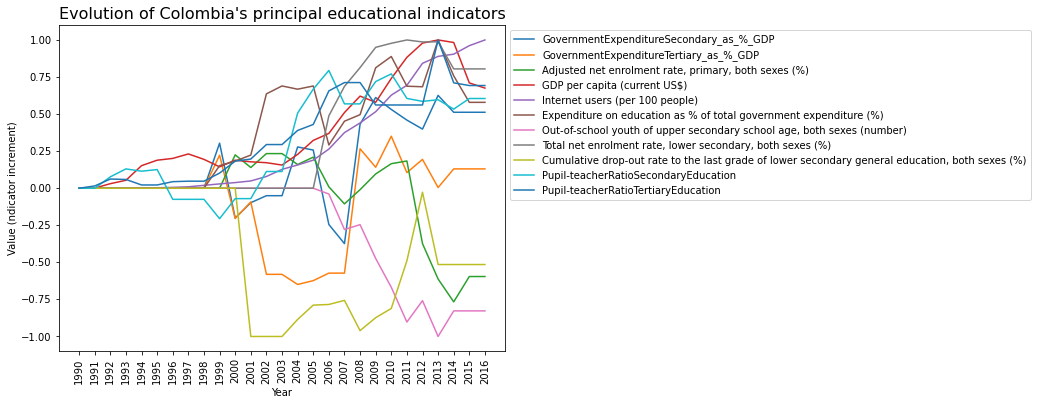

In [25]:
plotting_indicators_growth_country(edStatsDataSummary_indicators, "Colombia", selected_indicators)

<h4> - United States case.</h4>

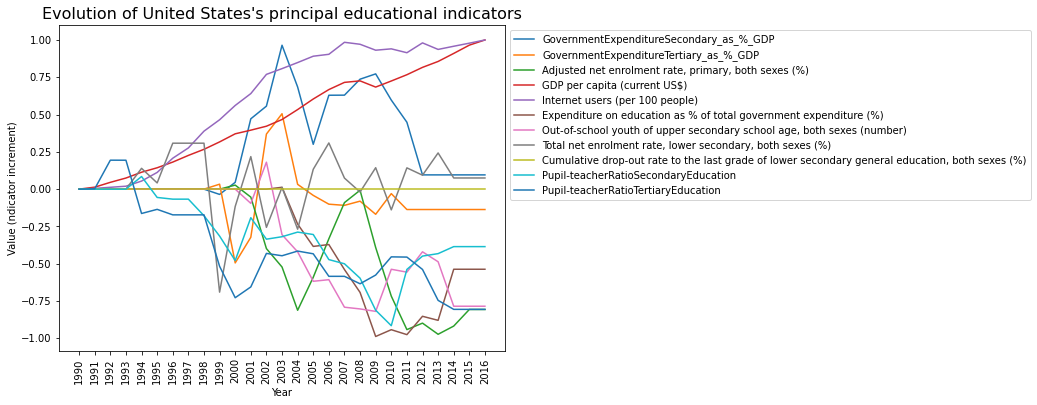

In [26]:
plotting_indicators_growth_country(edStatsDataSummary_indicators, "United States", selected_indicators)

<h4>- France case.</h4>

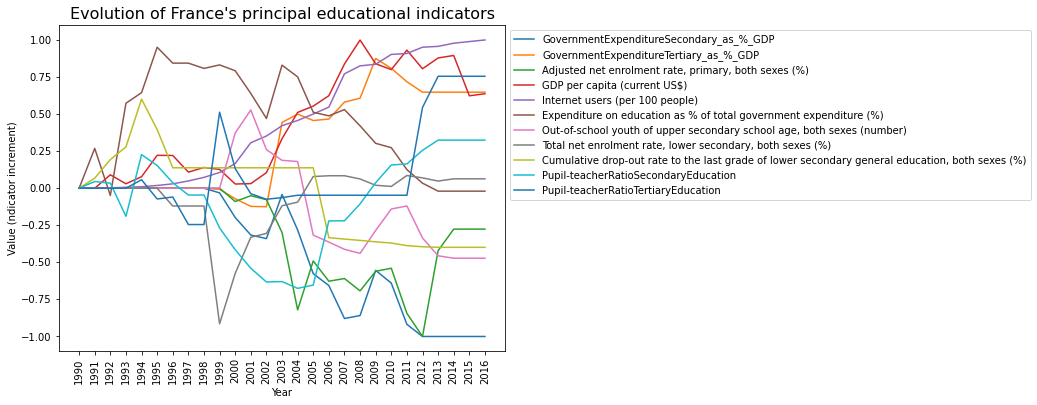

In [27]:
plotting_indicators_growth_country(edStatsDataSummary_indicators, "France", selected_indicators)

<h3>2.3.2.1 "edStatsData" economical analysis : Education investment.</h3>
<p> This section aims to explore the countries which at specific periods lead on the educational investment. </p>
<ol>
<p>-Selecting the top-15 of countries in a year with the largest invesment on education
<p>-Creating visualization plots to check the distribution of results founded for the top-15 education investors countries.
<p>-Finding the continents having the largest investment in education.
<p>-The database is filtered and transformed in several ways to summarize the results.
</ol>

<h4>- Calculating top-15 countries in education investment for 2016 year.</h4>

<Figure size 864x576 with 0 Axes>

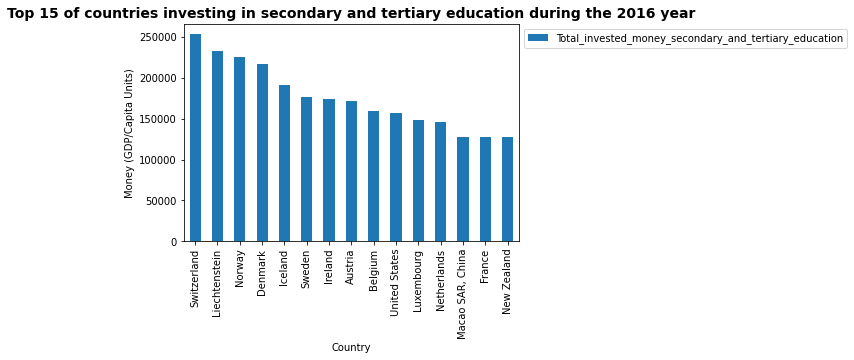

In [28]:
countries ,inv = top_n_countries_educational_investment(edStatsDataSummary_indicators_unnormalized, 2016, 15,True)

<h4>- Obtaining education investment series.</h4>
<p> The first step during this phase involves the retrieving of investment information in a dataframe (having m rows for countries, and the values of s columns for years).
Afterwards, the information is transformed to be retrieved in a dataframe (having s rows for years, and m columns for each country in the database). The final dataframe only contains information about education investment.</p>

In [29]:
#Create a list with the years.
list_years = list(map(str,range(1990, 2017)))
list_years.insert(0,'Indicator Name')
list_years.insert(0,'Country Name')
list_years = list_years[2:]

#Storing the information of the dataframe to extract the investment series.
countries_education_investment_series = edStatsDataSummary_indicators_unnormalized

#Create a list with countries.
list_countries = countries["Country Name"].tolist()

#Obtain a dataframe with the investment in education with series in columns (countriesxind-year),
series_education_investment = df_country_continent_mapping(calculate_investment_education(countries_education_investment_series, list_countries, list_years),equiv_2)
all_series_education_investment = df_country_continent_mapping(calculate_investment_education(countries_education_investment_series,list(countries_education_investment_series["Country Name"].unique()),list_years),equiv_2)

#Obtain series of education for an specific year.
series_education_investment_2016 = obtain_indicator_column_year(series_education_investment,'Total_invested_money_secondary_and_tertiary_education',2016)

#Obtain series education investment(s years, m countries)
series_education_investment_1 = series_education_investment
series_education_investment_1 = transform_row_series_into_columns_series_per_country(series_education_investment_1,'Total_invested_money_secondary_and_tertiary_education')
series_education_investment_2 = all_series_education_investment
series_education_investment_2 = transform_row_series_into_columns_series_per_country(series_education_investment_2,'Total_invested_money_secondary_and_tertiary_education')

#Finally, we obtain two dataframes. The first one contains (series_education_investment_1) information for the top-15 countries investing in education.
#The second one has (series_education_investment_2)  information for all the countries in the database.
print(series_education_investment_2.head(2))

  TimeStamp  Afghanistan     Albania      Algeria  American Samoa  \
0      1990          0.0  944.801522  4915.673046             0.0   
1      1991          0.0  515.217488  3534.349299             0.0   

       Andorra       Angola  Antigua and Barbuda     Argentina      Armenia  \
0  6052.071199  1109.071459          8283.614810  10261.797076  1185.646248   
1  6261.741468  1299.665962          8605.686518  13580.552445  1096.919190   

   ...  United States      Uruguay  Uzbekistan      Vanuatu  Venezuela, RB  \
0  ...   65923.443322  4206.498962         0.0  4617.477523    5622.348218   
1  ...   67163.743182  5033.618575         0.0  5354.468697    6043.708962   

      Vietnam  Virgin Islands (U.S.)  Yemen, Rep.      Zambia    Zimbabwe  
0  370.438931                    0.0          0.0  166.248782  666.287761  
1  540.233795                    0.0          0.0  166.579400  639.175740  

[2 rows x 205 columns]


<h4>- Graphical results for education investment : Investment along years (top-15 countries in 2016 year).</h4>

<Figure size 1440x1008 with 0 Axes>

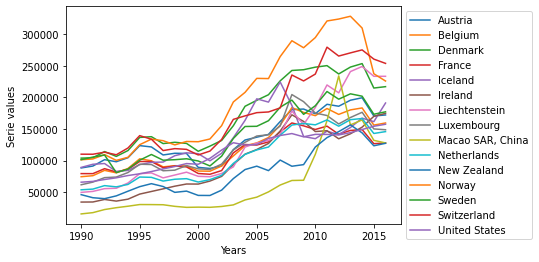

In [30]:
series_lines_plot(series_education_investment_1,"World Education investment")

<h4>- Graphical results for education investment : Box plots among countries (top-15 countries in 2016 year).</h4>

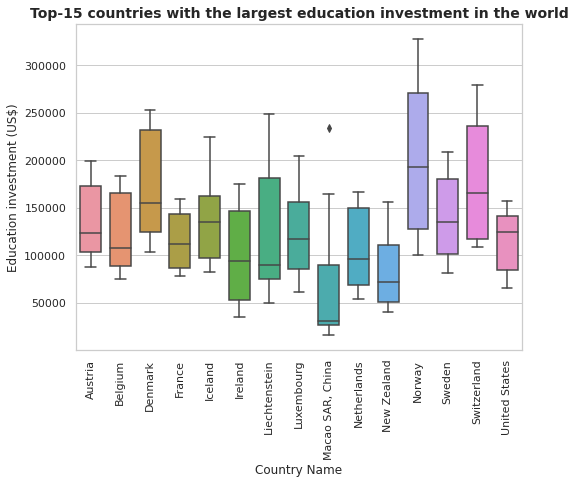

In [31]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
msg = 'Top-'+str(len(series_education_investment_1.columns)-1)+' countries with the largest education investment in the world'
g = sns.boxplot(data=series_education_investment_1, width=0.7,)
g.set(xlabel='Country Name', ylabel='Education investment (US$)')
g.set_title(msg, fontsize=14,fontweight="bold")
_ = g.set_xticklabels(g.get_xticklabels(),rotation=90)

<h4>- Descriptive statistics for education investment (top-15 countries in 2016 year).</h4>

In [32]:
#Describe the moscademyt important statistics in a dataframe.
print(series_education_investment_2.describe())

       Afghanistan      Albania       Algeria  American Samoa       Andorra  \
count         27.0    27.000000     27.000000            27.0     27.000000   
mean           0.0  3426.834787   5772.372218             0.0  15664.531744   
std            0.0  2381.230776   2805.472505             0.0  10550.617412   
min            0.0   322.819992   2902.467830             0.0   5204.554862   
25%            0.0  1201.097088   3293.003979             0.0   6135.722243   
50%            0.0  2793.463109   4915.673046             0.0  10507.471437   
75%            0.0  6063.984949   7741.512848             0.0  26035.199373   
max            0.0  6764.934339  10643.709329             0.0  37395.724228   

            Angola  Antigua and Barbuda     Argentina      Armenia  \
count    27.000000            27.000000     27.000000    27.000000   
mean   2281.528113         12739.803701  20929.249666  2989.515079   
std    1884.281522          3089.834241  10829.746170  2257.414097   
min     

<h4>- Graphical results for education investment : Pie-chart for continents' education investment (all countries 2016 year).</h4>

/home/juan-david/Documents/data_science/course_openclassrooms/projet_2/livrables/p2_analyse_exploratoire_fonctions_aide.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'Total_invested_money_secondary_and_tertiary_education_2016')

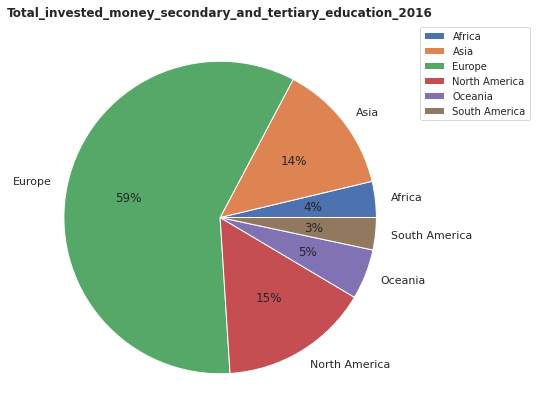

In [33]:
#Storing unnormalized df into a new variable.
education_investment_2016 = edStatsDataSummary_indicators_unnormalized

#Create a list with countries.
list_countries = education_investment_2016["Country Name"].tolist()

#Obtain a dataframe with the investment in education with series in columns (countriesxind-year),
series_education_investment_2016 = calculate_investment_education(education_investment_2016, list_countries, list_years) 

#Add mapping to column.
series_education_investment_2016 = df_country_continent_mapping(series_education_investment_2016, equiv_2)

#Create pie-chart plot.
series_education_investment_2016 = obtain_indicator_column_year(series_education_investment_2016, 'Total_invested_money_secondary_and_tertiary_education', str(2016))
continent_education_investment_2016 = series_education_investment_2016.groupby('Country Continent')['Total_invested_money_secondary_and_tertiary_education_2016'].sum()
continent_education_investment_2016 = continent_education_investment_2016.to_frame()
continent_education_investment_2016.index.names = ['']

plot = continent_education_investment_2016.plot.pie(y='Total_invested_money_secondary_and_tertiary_education_'+str(2016), figsize=(7, 14),autopct='%1.0f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={"size":10})
plt.axes().set_ylabel('')
plt.title('Total_invested_money_secondary_and_tertiary_education_'+str(2016),fontweight="bold" )

<h3>2.3.3.1 Variance Analysis.</h3>
<p> This section aims to analyse distribution and variance for indicator values to derive conclusions about values' frequency, and their spread around means. Afterwards, an attractivity function is constructed to carry out the selection of countries for the company's business.</p>

<h4>- Plotting indicators' histograms.</h4>

Adjusted net enrolment rate, primary, both sexes (%)
Cumulative drop-out rate to the last grade of lower secondary general education, both sexes (%)
Expenditure on education as % of total government expenditure (%)
GDP per capita (current US$)
GovernmentExpenditureSecondary_as_%_GDP
GovernmentExpenditureTertiary_as_%_GDP
Internet users (per 100 people)
Out-of-school youth of upper secondary school age, both sexes (number)
Pupil-teacherRatioSecondaryEducation
Pupil-teacherRatioTertiaryEducation
Total net enrolment rate, lower secondary, both sexes (%)


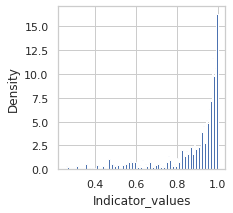

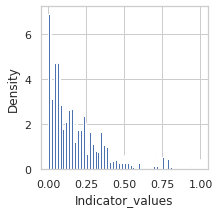

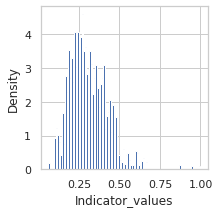

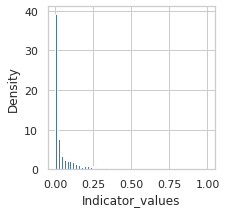

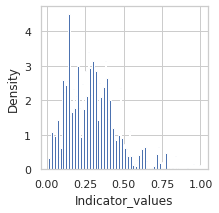

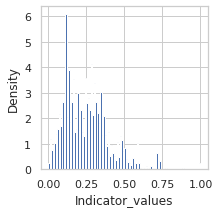

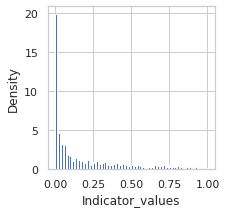

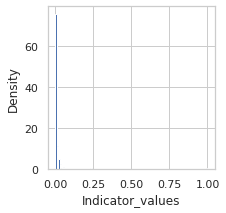

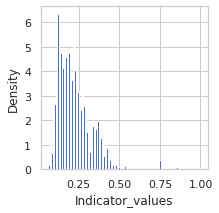

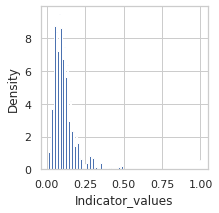

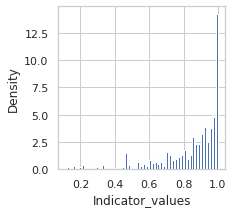

In [34]:
#Plotting histograms.
j = 0
for i in list(edStatsDataSummary_indicators_unnormalized["Indicator Name"].unique()):
    serie = edStatsDataSummary_indicators_unnormalized
    serie = create_indicator_serie(serie,i,list_years)
    plot_indicator_histogram(serie,i,j)
    j = j +1

<h4>- Obtaining average and standard deviation for education investment.</h4>
<p> Investment in education was calculted from the original's database, the averaage and standard deviation calculations for the investment in education are added to the summary dataframe containing all standard deviation and average calculations per indicator.</p>

In [35]:
#Transforming the data related with the education investment for the average and standard deviation analysis.
series_education_investment_2 = all_series_education_investment
series_education_investment_2 = transform_row_series_into_columns_series_per_country(series_education_investment_2,'Total_invested_money_secondary_and_tertiary_education')
series_education_investment_2_normalized = df_normalized_with_max_value_years_countries(series_education_investment_2)

#Calculating the standard deviation related with the investment education dataframe.
std_series_education_investment_2_normalized = np.std(erase_too_many_zeros_vector(series_education_investment_2_normalized))
std_inv_name = []
std_inv_name.append('Total_invested_money_secondary_and_tertiary_education')
std_inv_value = []
std_inv_value.append(std_series_education_investment_2_normalized)
std_invt_df = pd.DataFrame(list(zip(std_inv_name,std_inv_value )))

#Calculating the the average education investment in education per year and country.
mtx_avg_education_investment = series_education_investment_2_normalized.iloc[:,1:].to_numpy()
mtx_avg_education_investment = mtx_avg_education_investment.mean(axis=0)
mtx_avg_education_investment = mtx_avg_education_investment.reshape(mtx_avg_education_investment.shape[0],1)
df_avg_education_investment = pd.DataFrame(mtx_avg_education_investment)
df_avg_education_investment.columns = ['Total_invested_money_secondary_and_tertiary_education']

print(std_invt_df.shape)
print(df_avg_education_investment.shape)

(1, 2)
(204, 1)


<h4>- Obtaining standard deviation for all indicators.</h4>
<p> Calculating average and standard deviation for all indicators series, and then adding to them the obtained results for investment in education within a dataframe.</p>

In [36]:
df_desvs = db_indicators_dev_standard(edStatsDataSummary_indicators_unnormalized,list_years)
#Adding the investment in education info for the dataframe containing the standard deviation information of the indicators.
df_desvs = pd.concat([df_desvs, std_invt_df], axis = 0)
df_desvs.columns = ['Indicator Name', 'sd']
print(df_desvs)
print(df_desvs.shape)

                                       Indicator Name        sd
0   Adjusted net enrolment rate, primary, both sex...  0.152235
1   Cumulative drop-out rate to the last grade of ...  0.179485
2   Expenditure on education as % of total governm...  0.115480
3                        GDP per capita (current US$)  0.099924
4             GovernmentExpenditureSecondary_as_%_GDP  0.185744
5              GovernmentExpenditureTertiary_as_%_GDP  0.168241
6                     Internet users (per 100 people)  0.261614
7   Out-of-school youth of upper secondary school ...  0.073517
8                Pupil-teacherRatioSecondaryEducation  0.103448
9                 Pupil-teacherRatioTertiaryEducation  0.090105
10  Total net enrolment rate, lower secondary, bot...  0.189956
0   Total_invested_money_secondary_and_tertiary_ed...  0.136373
(12, 2)


<h3>2.3.3.2 Creating Attractivity score function.</h3>
<p> Create a function allowing to rank countries by their relationship with online education according to indicators that are important for Academy's business plan. A weighted average over indicators' standard deviation, and a factor multiplication to enhance/decrease the importance of indicators are done to find the function weights.</p>

<h4>- Obtaining scoring function weights .</h4>
<p>Find a matrix of size (n,1); n: indicators.</p>
<p>The subjective score that is attributed to each indicator depends on its type. Those scores have an associated multiplication factor, that increase/decrease the value of an indicator standard deviation to control its importance. The following are the default values, adjusted by common sense about the business plan.</p>
<ol>
<p>- Economic indicators : 5.</p>
<p>- Online trends, internet usage, social networks...etc. : 8.</p>  
<p>- Education's problems, advantages, and/or disadvantanges : 6. (Positive or negative depending on aspect type)</p>
<p>- Political factors : 5 </p>   
<p>- Language, literacy and academic resource : 6.</p>
</ol>

In [37]:
#Giving to indicators a subjective valor given their category.
subjective_appreciation = {
    'Calification' : [6, -6, 5, 5, 5, 5, 8, -6, 7, 7, 6, 5]
}

df_subjective_appreciation = pd.DataFrame(subjective_appreciation)
df_subjective_appreciation['Indicator importance'] = df_subjective_appreciation['Calification'].apply(lambda x: 4 if x>=8 else (3 if x == 7 else (2 if x==6 else(1 if x==5 else(1/2 if x==4 else(1/3 if x==3 else(1/4 if x<=2 else 0 )))))))
df_desvs = df_desvs.reset_index(drop=True)
df_subjective_appreciation = df_subjective_appreciation.reset_index(drop=True)
df_desvs_mod = pd.concat([df_desvs,df_subjective_appreciation],axis = 1)
df_desvs_mod = df_desvs_mod[['Indicator Name','sd','Calification','Indicator importance']]
df_desvs_mod["sd_weighted"] = df_desvs_mod["sd"] * df_desvs_mod["Calification"]

#Obtain weights from std of each indicator.
data = df_desvs_mod.iloc[:,4:5].to_numpy()
matx_indicators = data/data.sum(axis=0)
print(matx_indicators.shape)
print(matx_indicators)

(12, 1)
[[ 0.12159772]
 [-0.14336402]
 [ 0.07686656]
 [ 0.06651229]
 [ 0.12363597]
 [ 0.11198578]
 [ 0.27861971]
 [-0.05872211]
 [ 0.09640057]
 [ 0.08396637]
 [ 0.15172775]
 [ 0.09077341]]


<h4>- Obtaining indicators' averages through years per each country.</h4>
<p> Find a matrix of size (m,n); m: countries, n: indicators.</p>

In [38]:
df_country_ind = obtain_averages_indicators_per_country(edStatsDataSummary_indicators_unnormalized,list_years)
df_country_ind = pd.concat([df_country_ind,df_avg_education_investment],axis=1)
matx_country_ind = df_country_ind.iloc[:,1:].to_numpy()
print(matx_country_ind.shape)
print(matx_country_ind)

(204, 12)
[[0.0 0.06263055454954335 0.34344050274852017 ... 0.13884883984262691
  0.6549822235107421 0.0]
 [0.9472561531148037 0.09123192036385389 0.23365446020657807 ...
  0.1071654921716725 0.9406281789143884 0.010445124333129883]
 [0.9402728975827257 0.25693684130815037 0.2417452325905821 ...
  0.15429890380084202 0.777090165879991 0.01759441270515885]
 ...
 [0.6894052171635762 0.18005909088755606 0.5170550485861813 ...
  0.21213900980655587 0.6146983775386102 0.0]
 [0.7672938422856315 0.07177046034762509 0.15673417261420108 ... 0.0 0.0
  0.0012961109527999148]
 [0.8402701778272222 0.060303361677484485 0.2661461149753075 ...
  0.1328011949669693 0.831766577826606 0.001677260599442182]]


<h4>- Attractivity score calculation.</h4>
<p> Find a matrix of size (m,1); m: countries.</p>

In [39]:
#Calculating the score by making the matrizes dot.
matx_country_rankings = np.dot(matx_country_ind,matx_indicators)

#Storing results in a dataframe.
scoring_results = pd.concat([df_country_ind['Country Name'],pd.DataFrame(matx_country_rankings, columns =['Attractivity score'])],axis=1)
scoring_results = scoring_results.sort_values(by='Attractivity score', ascending=False)
scoring_results = scoring_results.reset_index(drop=True)

#Adding the continent columns for further analysis.s
scoring_results = df_country_continent_mapping(scoring_results, equiv_2)

#pd.set_option("display.max_rows", None, "display.max_columns", None)
#pd.set_option("display.max_rows", None, "display.max_columns", None)
scoring_results.head(10)

,Country Name,Attractivity score,Country Continent
0,Norway,0.652603,Europe
1,Denmark,0.646845,Europe
2,Finland,0.625753,Europe
3,Sweden,0.624458,Europe
4,Iceland,0.618448,Europe
5,Switzerland,0.607623,Europe
6,New Zealand,0.600488,Oceania
7,Canada,0.589265,North America
8,United States,0.577002,North America
9,Netherlands,0.570512,Europe


<h3>2.3.3.4 Selecting relevant countries for the company's business.</h3>
<p> - Retrieve a list containing the names of the 10 most appropriate countries to deploy the Academy's business plan</p>

In [40]:
selected_countries = scoring_results["Country Name"].iloc[0:10].values.tolist()
print(selected_countries)

['Norway', 'Denmark', 'Finland', 'Sweden', 'Iceland', 'Switzerland', 'New Zealand', 'Canada', 'United States', 'Netherlands']


<h4>Graphical results: Plot lines for indicators values associated to selected countries.</h4>
<p>- Provide line plots per each indicator to visualize the trends of the selected countries along the years of analysis.</p>

/home/juan-david/Documents/data_science/course_openclassrooms/projet_2/livrables/p2_analyse_exploratoire_fonctions_aide.py:195: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,14))


<Figure size 1440x1008 with 0 Axes>

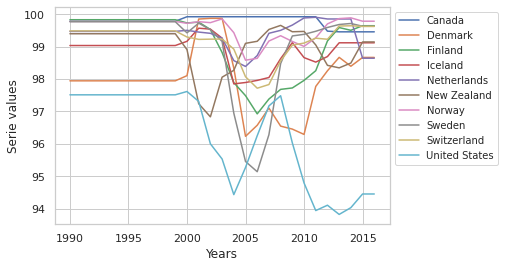

<Figure size 1440x1008 with 0 Axes>

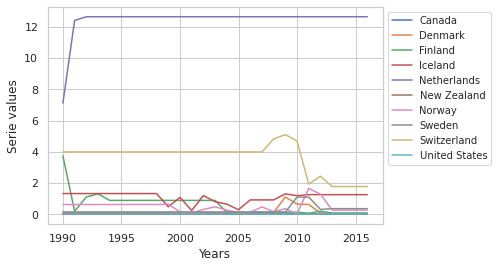

<Figure size 1440x1008 with 0 Axes>

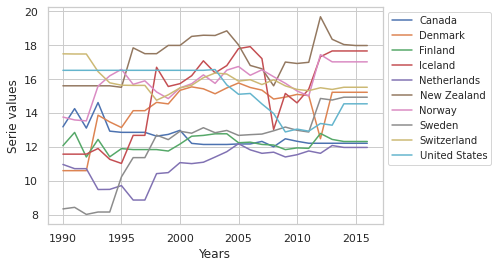

<Figure size 1440x1008 with 0 Axes>

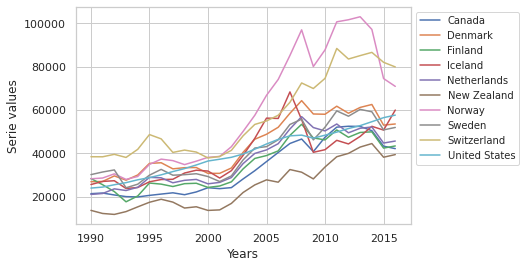

<Figure size 1440x1008 with 0 Axes>

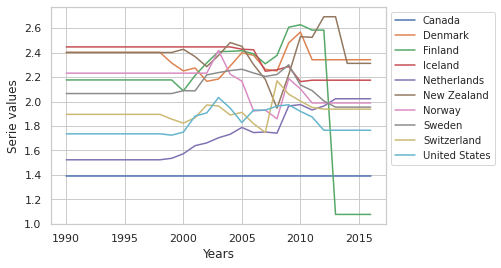

<Figure size 1440x1008 with 0 Axes>

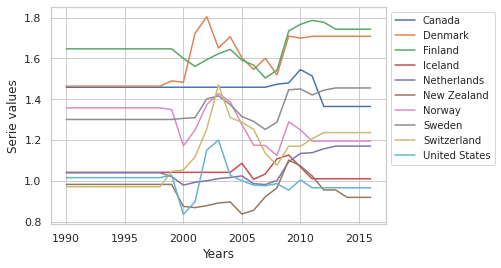

<Figure size 1440x1008 with 0 Axes>

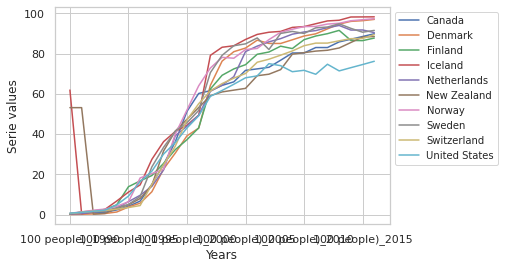

<Figure size 1440x1008 with 0 Axes>

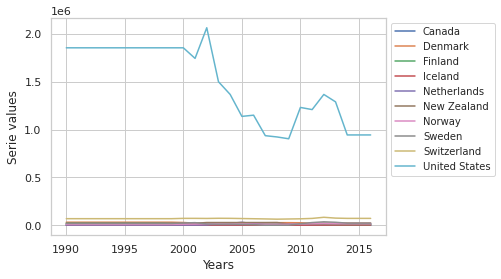

<Figure size 1440x1008 with 0 Axes>

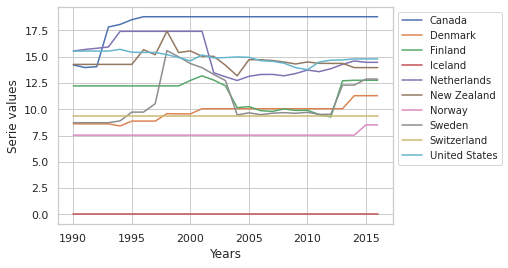

<Figure size 1440x1008 with 0 Axes>

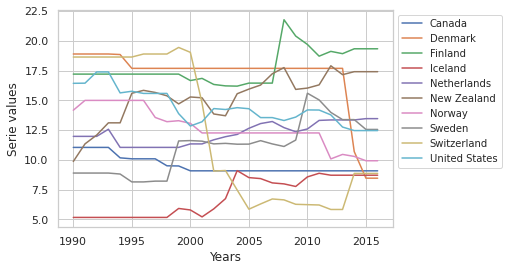

<Figure size 1440x1008 with 0 Axes>

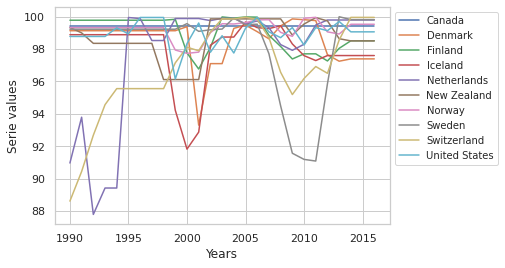

<Figure size 1440x1008 with 0 Axes>

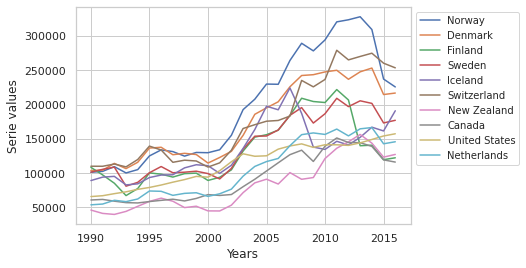

In [41]:
for i in list(edStatsDataSummary_indicators_unnormalized['Indicator Name'].unique()):
    serie = edStatsDataSummary_indicators_unnormalized[edStatsDataSummary_indicators_unnormalized["Country Name"].isin(selected_countries)]
    serie = create_indicator_serie_unnormalized(serie,i,list_years)
    series_lines_plot(serie,i)
    

series_education_investment_3 = all_series_education_investment
series_education_investment_3 = transform_row_series_into_columns_series_per_country(series_education_investment_2,'Total_invested_money_secondary_and_tertiary_education')
columns_inv_sel_countries = selected_countries
columns_inv_sel_countries.append('TimeStamp')
series_education_investment_3 = series_education_investment_3[columns_inv_sel_countries]
series_lines_plot(series_education_investment_3,"World Education investment")